# CSII 2024 Exercise 09: Introduction to MIMO Systems

© 2024 ETH Zurich, Stephan König, Pierre Suter, Joël Gmür, Ivan Robuschi, Dejan Milojevic; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

Authors:
- Stephan König; skoenig@ethz.ch
- Pierre Suter; pisuter@ethz.ch
- Joël Gmür; jgmuer@ethz.ch
- Ivan Robuschi; irobuschi@ethz.ch

## Installation
First we need to install and import all necessary libraries to solve the tasks. You are free to use libraries different to our recommendation. But remember that these are some of the most commonly used ones. Don't panic, the installation of all the packages may take a few seconds.

In [ ]:
%pip install D:\6CS2Solutions\cs2solutions --force-reinstall

In [ ]:
from cs2solutions import intromimo

import numpy as np
import sympy as sp
import control as ctrl
import matplotlib.pyplot as plt
import scipy.signal as signal
# from sympy.abc import s, t
# from sympy import simplify, fraction
# from scipy import signal

## CS II Bot Position Control
We want to control the position of the CS II Bot, which you have already seen in the first Lecture. The dynamics are given in the Equation below and a graphical representation of the system is shown in the Figure below.



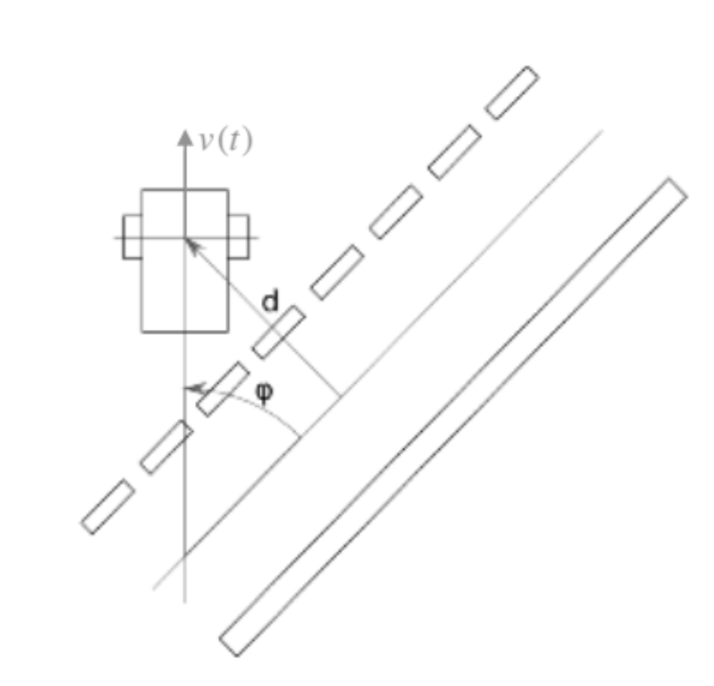

$$
\dot x(t) = \dfrac{d}{dt} \left[\begin{array}{c} d(t) \\ \varphi(t) \end{array} \right] = \left[\begin{array}{c} v(t)\,sin\,\varphi(t) \\ \omega(t) \end{array} \right] = \left[\begin{array}{c} u_1(t)\,sin\,x_2(t) \\ u_2(t) \end{array} \right] \;\;\;\ y(t) = \left[\begin{array}{c} 1&0 \\ 0&1 \end{array} \right]x(t)
$$

<br>

The state of the system is described by the lateral position $x_1(t) = d(t)$ and the orientation $x_2(t) = φ(t)$, which can be controlled by the linear ($v(t)$) and angular ($ω(t)$) speeds exerted by the motors (explicitly: $\left[\begin{array}{c} V_{left}(t)&V_{right}(t) \end{array} \right] → [\begin{array}{c} v(t)&ω(t) \end{array}])$.

As we have multiple inputs and multiple outputs, we need to deal with a MIMO system.

## Exercise 1: MIMO System Matrices

*   Derive the systems matrices by hand (you do not need to program the calculation)
*   Implement the derived system matrices in the function "sys_matrices" and return the results as a tuple.
*   Extend the system matrices and extract the number of inputs and outputs

<br>

The given CS II Bot is modeled as a nonlinear system. In order to describe it using the system matrices, we need to linearize it around its equilibrium point which is given as:

<br>

$$f(x_{eq}, y_{eq}) = 0 \rightarrow x_{eq} = (d, 0), \;\; u_{eq} = (v, 0)$$

<br>

Using this, derive the system matrices A, B, C, D and then implement them in the cell below. To avoid complicated symoblic math programming, you can set the variable _"v"_ equal to 3. Take care of the appropriate dimensions!

<br>

Hints:

*   The [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) library is very useful to implement vectors and matrices!

*   If you need to review the formula for linearization, you can take a look at the Lecture slides from week 1.


### Exercise 1.1: System Matrices

_**Task: Calculate the system matrices by hand and then proceed by implementing the results in the given function.**_

In [ ]:
"""
Set v = 3
"""

def sys_matrices() -> tuple:

    #TODO:

    return A, B, C, D


# If you want to check the output of your function, just use (uncomment) the following command:
# print(sys_matrices())


# Run the unit test on your function
intromimo.test_sys_matrices(sys_matrices(), intromimo.sol_sys_matrices(), True)

### Exercise 1.2: Hovering extension to the CS II Bot

Because there is a lot of traffic we want to include a hovering functionality to our CS II Bot. The engineers in our team decided to stabilize the Bot in a constant height (_z = 2_) over the ground which can't be controlled or changed.

Such that they were able to add this functionality to the Bot, they needed to change certain things of the voltage supply of the two electric motors.

To understand the tweaked Bot, they provided the system matrices (denoted with a "_") as:

<br>

$$
A\_ \;= \; \left[\begin{array}{c} 0&1&0 \\ 1&0&0 \\ 0&0&1 \end{array} \right], \;\;\; B\_ = \left[\begin{array}{c} 1&0 \\ 0&1 \\ 0&0 \end{array} \right], \;\;\; C\_ = \left[\begin{array}{c} 1&0&0 \\ 0&1&0 \\ 0&0&1 \end{array} \right], \;\;\; D\_ = \left[\begin{array}{c} 0&0 \\ 0&0 \\ 0&0 \end{array} \right]
$$

<br>

Now your task is it to programatically extract the number of inputs and outputs of the given system matrices. The matrices are already initialized, so you just need to complete the two functions.


In [ ]:
# Initialize the given system matrices of the tweaked Bot

A_ = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]], dtype=int)
B_ = np.array([[1, 0], [0, 1], [0, 0]], dtype=int)
C_ = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=int)
D_ = np.array([[0, 0], [0, 0], [0, 0]], dtype=int)


def num_inputs(A_: np.array, B_: np.array, C_: np.array, D_: np.array) -> int:

    #TODO:
    inputs = 0 #TODO

    return inputs


def num_outputs(A_: np.array, B_: np.array, C_: np.array, D_: np.array) -> int:

    #TODO:
    outputs = 0 #TODO

    return outputs


# Print the number of inputs and outputs

print(f"Number of inputs: {num_inputs(A_, B_, C_, D_)}")
print(f"Number of outputs: {num_outputs(A_, B_, C_, D_)}")

# Run the unit test on your function
intromimo.test_num_inputs_outputs(num_inputs, num_outputs, intromimo.sol_num_inputs, intromimo.sol_num_outputs, True)

## Exercise 2: MIMO Transferfunction of CS II Bot

To be able to do further analysis we need to look more closely at the system in the frequency domain. The goal of this task is to use the previously derived state space description and calculate the MIMO transferfunction.

### Exercise 2.1 Symbolic Transferfunction

As seen in the lecture, we can use the well-known formula from Control Systems for MIMO systems as well:

$$ P(s) = C \cdot (sI-A)^{-1} \cdot B + D $$
with $$ (sI-A)^{-1} = \frac{adj(sI-A)}{det(sI-A)} $$

Use the following codeblock to implement this formula to get the general transferfunction in dependence of s = j*ω. Consider the dimensionality of P(s)!

In this first step we will use symbolic math using the sympy library.

_**Task: Implement a function to calculate the transferfunction from the state space matrices and test it with the system from Exercise 1.1 as well as  the one from Exercise 1.2**_

_Hint: Use the sympy functions 'Matrix', 'Symbols', 'inv' and 'symplify'_

In [ ]:
def calc_tf_symb(A: np.array, B: np.array, C: np.array, D: np.array)-> sp.Matrix:
  """
  inputs: numpy matrices A, B, C, D representing the state space matrices derrived in Exercise 1.1
  output: numpy matrix P_s representing the MIMO transferfunction matrix in dependence of the symolic variable 's'
  """
  s = sp.symbols('s')
  I = np.eye(A.shape[0])

  # calculate the inverse of (s*I - A)
  term = sp.Matrix(s*I - A)
  inv_term = term.inv()

    # calculate P_s
  transferfunction = np.dot(C, np.dot(inv_term, B)) + D

  # simplify the answer so that there are no double fractions
  transferfunction = sp.simplify(transferfunction)
  return transferfunction


# execute and print
A, B, C, D = intromimo.sol_sys_matrices()


tf_symb = calc_tf_symb(A,B,C,D)
tf_symb_mod = calc_tf_symb(A_,B_,C_,D_)

print(f"The transfer functions of the CS2-Bot are: {tf_symb}")
print(f"The transfer functions of the hovering CS2-Bot are: {tf_symb_mod}")

### Exercise 2.1 Solution

In [ ]:
intromimo.test_calc_tf_symb(calc_tf_symb, intromimo.sol_calc_tf_symb, True)

### Exercise 2.2 Transferfunction using 'scipy'
Typically we use libraries, such as the "scipy" library, to help us analyse and design systems. The already gained knowledge about the inputs and outputs of the system will help you to fulfill this task. Remember that we already calculated the number of inputs and outputs of the modified CS II Bot. Use the same function, or your knowledge about control systems, to get these informations about the basic CS II Bot as well.

**_Task: Use the 'signal' package (implemented in the scipy library) to calculate the transferfunctions of the system state space matrices of Exercise 1.1 as well as Exercise 1.2_**

_Hint: MIMO systems are hard to represent, which is why the output appears in an unfamiliar format. The signal package supports the ss2tf function, which is capable of transforming a MIMO system from state space to transfer function representation. Make sure to carfeully read the documentation of the [ss2tf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ss2tf.html) function._

In [ ]:
#calculate the transferfunction of the state space model
def calc_tf_ctrl(A: np.array, B: np.array, C: np.array, D: np.array, number_output: int):

  # TODO

  return signal.ss2tf(A, B, C, D, number_output)


#print solution
tf_output1 = calc_tf_ctrl(A,B,C,D, 0)
tf_output2 = calc_tf_ctrl(A,B,C,D, 1)

tf_mod_output1 = calc_tf_ctrl(A_,B_,C_,D_, 0)
tf_mod_output2 = calc_tf_ctrl(A_,B_,C_,D_, 1)


print(f"The Transferfunctions of the CSII-Bot corresponding to output 1 (first column of the matrix): {tf_output1}\n")
print(f"The Transferfunctions of the CSII-Bot corresponding to output 2 (second column of the matrix): {tf_output2}\n")

print(f"The Transferfunctions of the hovering CSII-Bot corresponding to output 1 (first column of the matrix): {tf_mod_output1}\n")
print(f"The Transferfunctions of the hovering CSII-Bot corresponding to output 2 (second column of the matrix): {tf_mod_output2}\n")

### Exercise 2.2 Solution

In [ ]:
intromimo.test_calc_tf_ctrl(calc_tf_ctrl, intromimo.sol_calc_tf_ctrl, True)

## Exercise 3: MIMO poles and zeros calculation

As was the case for SISO systems, the zeros and poles of the MIMO system give us critical information about the system, though they are calculated differently. The way to calculate them as seen in the lectue is tedious and especially for complicated systems, manual calculation is impractical. Therefore we usually rely on libraries or proograms such as MATLAB to calculate zeros and poles

### Exercise 3.1 Calculation of the poles
Libraries can also be used to analyse MIMO systems. Calculate the poles of the basic and the modified CS II Bot using the control library.

In [ ]:
# get the poles of the basic CSII Bot
poles_basic =

print(f"Poles of the basic CSII Bot: {poles_basic}")


# get the poles of the modified CSII Bot
poles_mod =

print(f"Poles of the modified CSII Bot: {poles_mod}")


# Run unit tests to verify your results:
intromimo.test_poles()
intromimo.test_poles_mod()

### Exercise 3.2 Calculation of the zeros:
Sadly, libraries are not all-powerful and have their limitations. Try to use a similar approach to get the MIMO zeros of the two bots. What result can you see?

_Hint: You will trigger an error message. Try figuring out why this happens._

In [ ]:
# get the zeros of the basic CSII Bot
zeros_basic =

print(f"Zeros of the basic CSII Bot: {zeros_basic}")


# get the zeros of the modified CSII Bot
zeros_mod =

print(f"Zeros of the modified CSII Bot: {zeros_mod}")

### Exercise 3.1 Solution:


In [ ]:
# get the poles of the basic CSII Bot
poles_basic = ctrl.pole(ctrl.StateSpace(A, B, C, D))

print(f"Poles of the basic CSII Bot: {poles_basic}")


# get the poles of the modified CSII Bot
poles_mod = ctrl.pole(ctrl.StateSpace(A_, B_, C_, D_))

print(f"Poles of the modified CSII Bot: {poles_mod}")

### Exercise 3.2 Solution:

In [ ]:
# get the zeros of the basic CSII Bot
zeros_basic = ctrl.zeros(ctrl.StateSpace(A, B, C, D))

print(zeros_basic)


# get the zeros of the modified CSII Bot (-> NotImplementedError!)
zeros_mod = ctrl.zeros(ctrl.StateSpace(A_, B_, C_, D_))

print(zeros_mod)

## Exercise 4: Plotting Impulse Response

*   Import transfer functions from Exercise 2.2.
*   Calculate the impulse responses using the scipy.signal class.
*   Plot the amplitude over time for the impulse response of all transfer functions. Set a title and label the axes.

<br>

The unit impulse response of a system is given by the inverse Laplace transform of the transfer function according to this relation:

<br>
$p(t) = \mathcal{L}^{-1}\{P(s)\}$
<br>

The goal of this task is to calculate and plot the impulse response of the transfer functions from Exercise 2.2. After finishing the task you can compare your result to the plot given by the solution.

<br>

_Hint: Use the [scipy](https://docs.scipy.org/doc/scipy/reference/signal.html) library to calculate the impulse response and then plot it using the [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) library._

### Exercise 4.1: Store Transfer Functions from Exercise 2.2

Initialize the four transfer functions from Exercise 2.2 by specifying the numerator and denominator of each transfer function. For further calculations we use the scipy library (signal class) which documenation can be found [here](https://docs.scipy.org/doc/scipy/reference/signal.html).
<br>

_Hint: As all four transfer functions share the same denominator, you do not need to initialize it four times._

In [ ]:
'''
If you want to recall the transfer functions from Exercise 2.2, you can print them by uncommenting the command:
'''
# tf_output1 = calc_tf_ctrl(A,B,C,D, 0)
# tf_output2 = calc_tf_ctrl(A,B,C,D, 1)

'''
Naming (num_xy): First digit (x) refers to the input and second digit (y) to the output.
'''

# TODO:

den = #TODO

tf_11 = #TODO
tf_12 = #TODO
tf_21 = #TODO
tf_22 = #TODO



### Exercise 4.2: Impulse Response

Now we want to calculate the impulse response of the CS II Bot (MIMO system) by using the scipy library and the previously initialized transfer functions.
<br>

_Hint: Remember that for MIMO systems you need to calculate the impulse response for every single transfer function._

In [ ]:
# TODO:

time, response_11 =
time, response_12 =
time, response_21 =
time, response_22 =

### Exercise 4.3: Plotting

Plot the amplitude over time for the impulse response by using the matplotlib library. So that we do not forget what we've just done, set a title and label the axes. If there is any overlapping, try to comment out some of the lines so you can see which ones are affected.

In [ ]:
plt.figure()

# TODO:

plt.legend()
plt.grid(True)
plt.show()

### Exercise 4.1 Solution:

In [ ]:
# TODO:

'''
Initialize the four numerators of the transfer functions.
The function signal.TransferFunction requires a format like [a * s^n-1, b * s^n-2, ..., y * s, z * 1], where n represents the length of the vector
Denominator is the same for every transfer function and therefore needs only one initialization

Naming (num_xy): First number (x) refers to the input and second number (y) to the output.
'''
tf_output1 = calc_tf_ctrl(A,B,C,D, 0)
tf_output2 = calc_tf_ctrl(A,B,C,D, 1)

den =  tf_output1[1]

tf_11 = signal.TransferFunction(tf_output1[0][0], den)
tf_12 = signal.TransferFunction(tf_output2[0][0], den)
tf_21 = signal.TransferFunction(tf_output1[0][1], den)
tf_22 = signal.TransferFunction(tf_output2[0][1], den)

print(f"Transfer function 11: {tf_11}")
print(f"Transfer function 12: {tf_12}")
print(f"Transfer function 21: {tf_21}")
print(f"Transfer function 22: {tf_22}")

### Exercise 4.2 Solution:

In [ ]:
# TODO:

'''
Use the function signal.impulse from the scipy library to calculate the impulse response of the system.
Output of this function are two 1D arrays, one for time stamps and one for the amplitude.
We need to calculate the impulse response of all four transfer functions independently.

Naming: First number refers to the input and second number to the output.
'''

time, response_11 = signal.impulse(tf_11)
time, response_12 = signal.impulse(tf_12)
time, response_21 = signal.impulse(tf_21)
time, response_22 = signal.impulse(tf_22)

### Exercise 4.3 Solution

In [ ]:
'''
Standard matplotlib plotting
Use labels to represent all impulse responses in one plot.
'''

plt.figure()

# TODO:

plt.plot(time, response_11, label='Input 1 to Output 1')
plt.plot(time, response_12, label='Input 1 to Output 2')
plt.plot(time, response_21, label='Input 2 to Output 1')
plt.plot(time, response_22, label='Input 2 to Output 2')

plt.title('Impulse Responses of CS II Bot')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()